In [1]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os

In [2]:
folder='3_21/'
folder2='3_25/'

In [3]:
filter1=np.ones(10)/10
filter2=np.ones(20)/20
Filter=filter2

In [4]:
def fn_para(x,a,b,c):
    return a*(x-b)**2+c

X0: 4.193602447600715
X0: 4.150675426762127
X0: 4.203840896275741
X0: 4.294822474358988
4.210735311249392


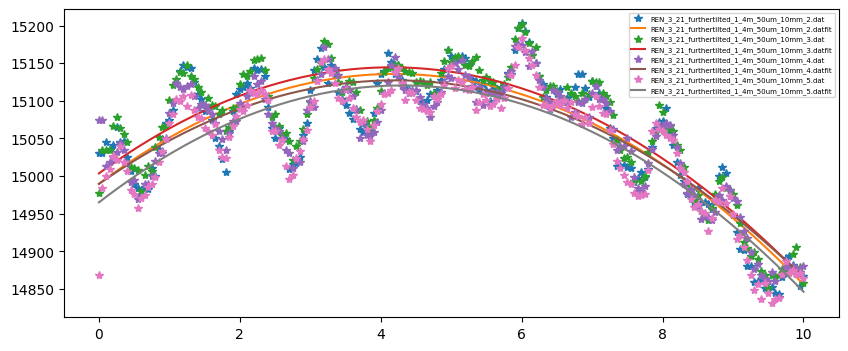

In [8]:
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[:5]:
    if file.startswith('REN_3_21_furthertilted_1_4m_50um_10mm_'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0:',popt[1])

        plt.plot(dz,data2,'-',label=file+'fit')
        DZ+=popt[1]
        #DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

X0: 4.085908465273614
X0: 4.512227038643782
X0: 4.472917904926556
X0: 4.518906728263753
X0: 4.308231723914099
4.37963837220436


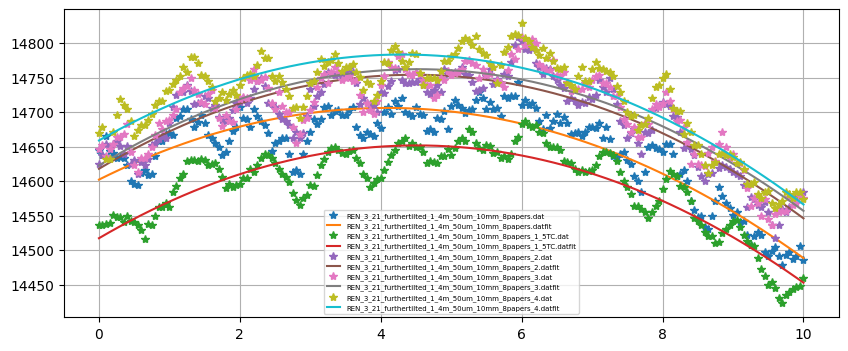

In [9]:

fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[5:]:
    if file.startswith('REN_3_21_furthertilted_1_4m_50um_10mm_8papers'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
        #plt.plot(dz[9:-10],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0:',popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')
        DZ+=popt[1]
        #DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

In [ ]:
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder)[:]:
    if file.startswith('REN_3_21_tilted_1_4m_50um_10mm'):
        data=np.genfromtxt(folder+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        data2=signal.convolve(data[:,1], Filter, mode='valid')
        plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print(popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')

        DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=5)
plt.show()

Max 2.9686511187984546
Max 3.1326209311842783
Max 2.9813853464548576
3.0333333333333337


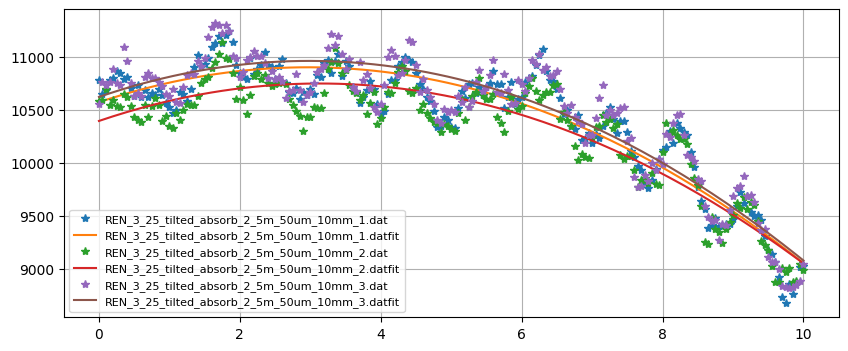

In [7]:
filter3=np.ones(40)/40
Filter=filter3
fig=plt.figure(figsize=(10,4))
dz=np.linspace(0,10,201)
DZ=0
n=0
for file in os.listdir(folder2)[1:]:
    if file.startswith('REN_3_25'):
        data=np.genfromtxt(folder2+file)
        plt.plot(dz,(data[:,1]),'*',label=file)
        plt.grid(axis='both')
        #data2=signal.convolve(data[:,1], Filter, mode='valid')
        #plt.plot(dz[int(Filter.size/2)-1:-int(Filter.size/2)],data2,'-',label=file+'filtered')
        #print(data2.max(),dz[np.where(data2==data2.max())])

        popt, pcov = curve_fit(fn_para, dz, data[:,1])
        data2=fn_para(dz,*popt)
        print('X0',popt[1])
        plt.plot(dz,data2,'-',label=file+'fit')


        DZ+=dz[np.where(data2==data2.max())][0]
        n+=1
print(DZ/n)
plt.legend(fontsize=8)
plt.show()

In [10]:
4.3-3.03

1.27